In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('./Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
N = 300
d = 10
ads_selected = []
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
total_reward = 0

for n in range(0, N):
    max_random = 0
    ad = 0
    for i in range(0, d):
        # Generate a random value from the Beta distribution for the current ad
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward += reward
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

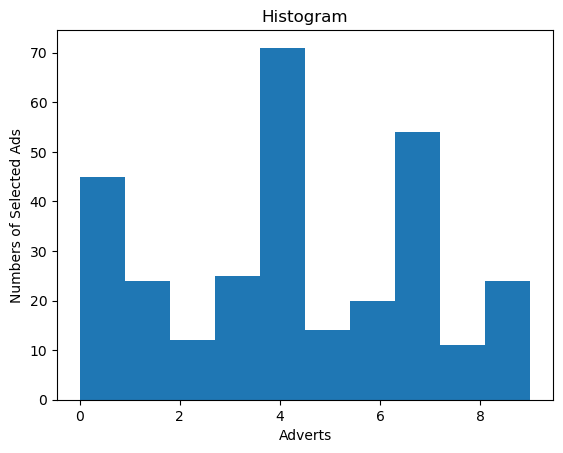

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Elegant Code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('./Ads_CTR_Optimisation.csv')

# Initialize variables
N = 300  # Total number of rounds
d = 10   # Number of ads
ads_selected = []
numbers_of_rewards_0 = np.zeros(d)  # Number of times each ad received a reward of 0
numbers_of_rewards_1 = np.zeros(d)  # Number of times each ad received a reward of 1
total_reward = 0

# Thompson Sampling Algorithm
for n in range(N):
    # Generate random beta values for all ads
    random_betas = np.random.beta(numbers_of_rewards_1 + 1, numbers_of_rewards_0 + 1)
    # Select the ad with the highest beta value
    ad = np.argmax(random_betas)
    # Record the selected ad
    ads_selected.append(ad)
    # Get the reward for the selected ad
    reward = dataset.values[n, ad]
    total_reward += reward
    # Update the reward counts
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

# Visualize the results
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()